# Using Octave Inside IPython

## Installation

The `octavemagic` extension provides the ability to interact with Octave.  It depends on the `oct2py` package,
which may be installed using `easy_install`.

To enable the extension, load it as follows:

In [18]:
%load_ext octavemagic

## Overview

Loading the extension enables three magic functions: `%octave`, `%octave_push`, and `%octave_pull`.

The first is for executing one or more lines of Octave, while the latter allow moving variables between the Octave and Python workspace.
Here you see an example of how to execute a single line of Octave, and how to transfer the generated value back to Python:

In [19]:
x = %octave [1 2; 3 4];
x

array([[ 1.,  2.],
       [ 3.,  4.]])

In [20]:
a = [1, 2, 3]

%octave_push a
%octave a = a * 2;
%octave_pull a
a

array([[2, 4, 6]])

When using the cell magic, `%%octave` (note the double `%`), multiple lines of Octave can be executed together.  Unlike
with the single cell magic, no value is returned, so we use the `-i` and `-o` flags to specify input and output variables.

In [21]:
%%octave -i x -o y
y = x + 3;

In [22]:
y

array([[ 4.,  5.],
       [ 6.,  7.]])

## Plotting

Plot output is automatically captured and displayed, and using the `-f` flag you may choose its format (currently, `png` and `svg` are supported).

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

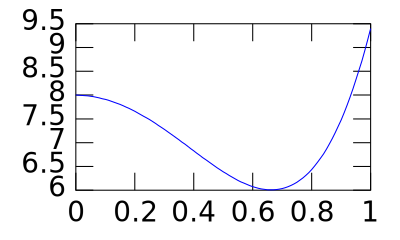

In [23]:
%%octave -f svg

p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

The plot size is adjusted using the `-s` flag:

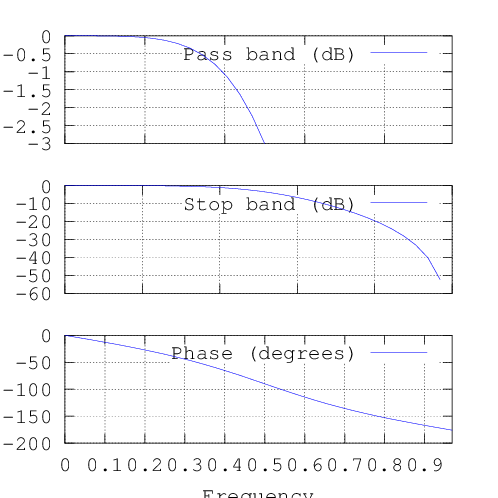

In [24]:
%%octave -s 500,500

# butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

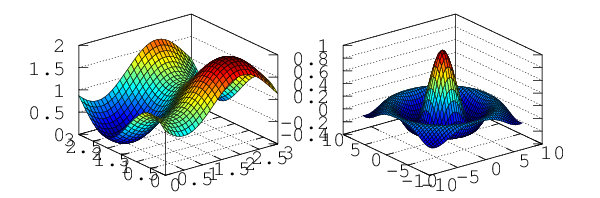

In [25]:
%%octave -s 600,200 -f png

subplot(121);
[x, y] = meshgrid(0:0.1:3);
r = sin(x - 0.5).^2 + cos(y - 0.5).^2;
surf(x, y, r);

subplot(122);
sombrero()

## Future work

After the next release of `oct2py`, we'll add the ability to interrupt/kill the current Octave session without restarting the Python kernel.